# Emotion Detection

### Importing required libraries

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random 
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator     
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D    
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model


from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:",tf.__version__)




Tensorflow version: 2.15.0


### Exploring Dataset

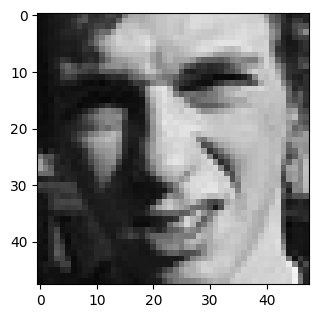

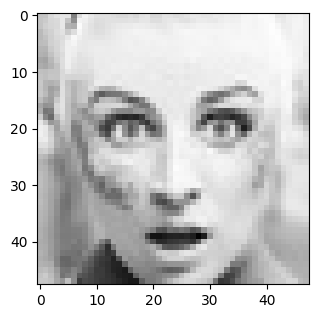

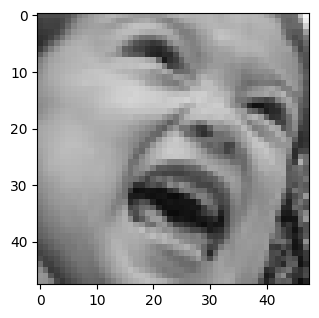

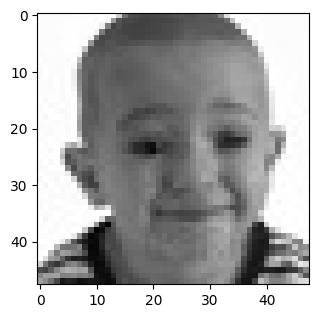

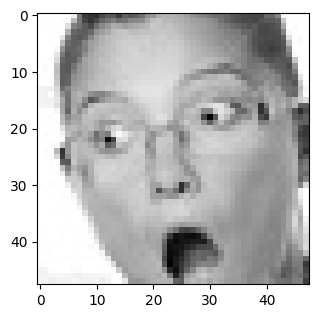

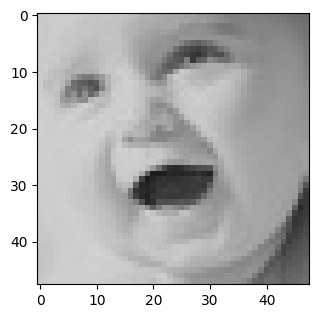

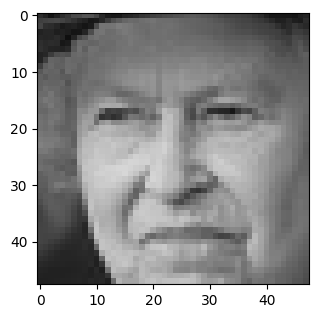

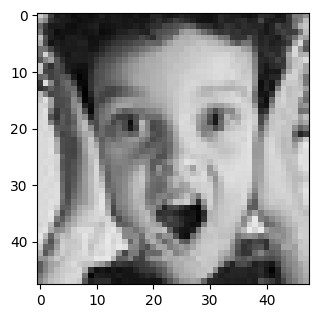

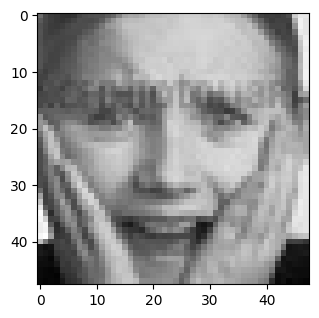

In [2]:
images=glob("train/**/**")     #it will display random images of figsize(12,12)
for i in range(9):
    image=random.choice(images)               #it will display random images of figsize(12,12)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('on')  #we  can do axis('off') also

### Preparing Data for Training 

In [3]:
img_size=48
batch_size=64
datagen_train=ImageDataGenerator()   #for generator we used train data
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size=(img_size,img_size),
                                                   color_mode="grayscale",
                                                   batch_size=batch_size,
                                                   class_mode="categorical",
                                                   shuffle=True)


datagen_validation=ImageDataGenerator()    # for validation we used test data
validation_generator = datagen_train.flow_from_directory("test/",
                                                   target_size=(img_size,img_size),
                                                   color_mode="grayscale",
                                                   batch_size=batch_size,
                                                   class_mode="categorical",
                                                   shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Defining a Model

In [4]:
def Convolution(input_tensor,filters,kernel_size):
    x=Conv2D(filters,kernel_size=kernel_size,padding="same")(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.25)(x)
    
    return x

In [5]:
def Dense_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=Dropout(0.25)(x)
    
    return x

In [6]:
def model_fer(input_shape):         
    inputs=Input(input_shape)     
    conv_1=Convolution(inputs,32,(3,3))   #we are calling convolution fn
    conv_2=Convolution(inputs,64,(5,5))   #64 is filters and (3,3) is kernels
    conv_3=Convolution(inputs,128,(3,3))   #these are the hyper parameters
    
    flatten=Flatten()(conv_3)
    
    dense_1=Dense_f(flatten,256)
    
    output=Dense(7,activation="softmax")(dense_1)  #7 are nodes bcoz we have 7 classes in data
    model=Model(inputs=[inputs],outputs=[output]) 
    
    model.compile(loss=['categorical_crossentropy'],optimizer='adam',metrics=['accuracy'])
    
    return model


In [7]:
model = model_fer((48,48,1)) 
model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_2 (Bat  (None, 48, 48, 128)       512       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 128)       0  

### Initializing the Model

In [8]:
epochs=15  #we have to put large number of epochs as we ar dong in our pc it takes a lot time
           #so when we will test online in kggle we will take large no.
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size #we are using // so that it
                                                        #it uses integer number.
checkpoint=ModelCheckpoint("model_weights.h5",monitor ='val_accuracy',save_weights_only=True,mode='max',
                           verbose=1)
callbacks=[checkpoint]


# Training the Model

#### The next cell takes time to complete

In [9]:
history=model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks)

Epoch 1/15


448/448 [==============================] - ETA: 0s - loss: 1.6612 - accuracy: 0.3727
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 545s 1s/step - loss: 1.6612 - accuracy: 0.3727 - val_loss: 1.7067 - val_accuracy: 0.3602
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3580 - accuracy: 0.4851
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 542s 1s/step - loss: 1.3580 - accuracy: 0.4851 - val_loss: 1.6348 - val_accuracy: 0.3804
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.1966 - accuracy: 0.5544
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 543s 1s/step - loss: 1.1966 - accuracy: 0.5544 - val_loss: 1.4011 - val_accuracy: 0.4806
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.0617 - accuracy: 0.6085
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 543s 1s

### Model Evaluation

In [10]:
model.evaluate(validation_generator)

113/113 [==============================] - 24s 210ms/step - loss: 2.1544 - accuracy: 0.4965


[2.154420852661133, 0.4965171217918396]

### Plotting Loss

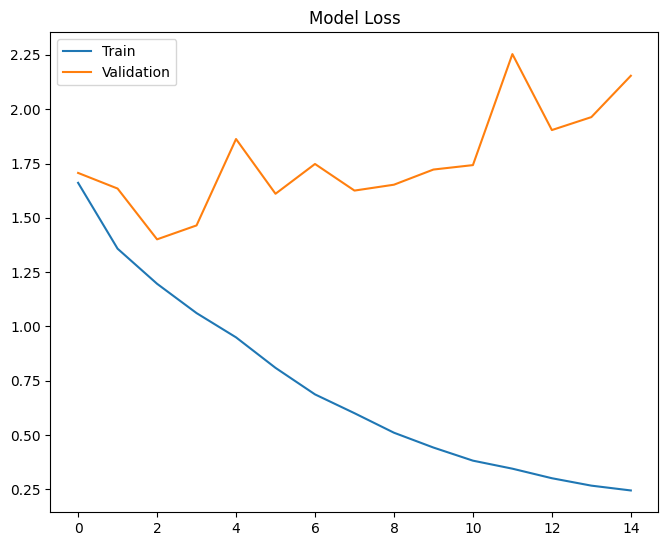

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

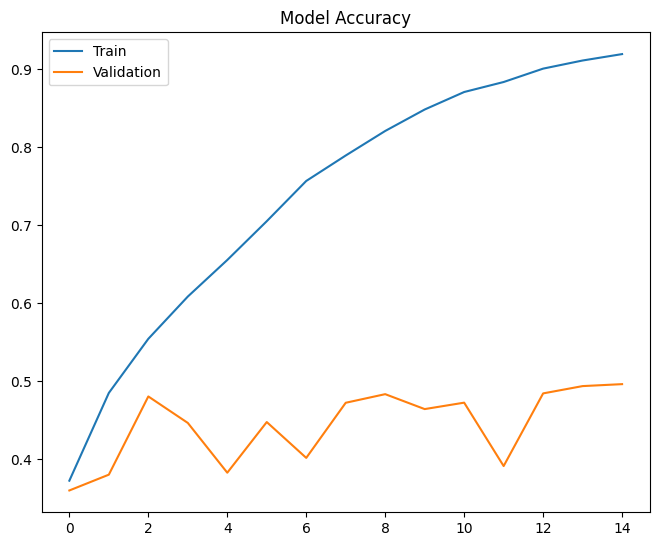

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

### Saving Model

In [13]:
model_json=model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)